# Traffic Congestion Prediction Model Using Linear Regression 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Reading the csv

In [13]:
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
data.sample(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
37524,NaN,289.940,0.00,0.0,5,Clear,sky is clear,2017-09-27 19:00:00,3662
17560,NaN,289.570,0.30,0.0,90,Rain,moderate rain,2015-08-19 17:00:00,6216
47948,NaN,286.890,0.25,0.0,75,Rain,light rain,2018-09-21 05:00:00,2919
30465,NaN,272.858,0.00,0.0,68,Clouds,broken clouds,2017-01-24 18:00:00,4356
40086,NaN,251.290,0.00,0.0,1,Clear,sky is clear,2017-12-26 02:00:00,213
40607,NaN,256.680,0.00,0.0,5,Clear,sky is clear,2018-01-13 17:00:00,3374
9574,NaN,278.840,0.97,0.0,32,Rain,moderate rain,2013-10-19 15:00:00,4885
28826,NaN,275.210,0.00,0.0,90,Rain,light rain,2016-12-04 19:00:00,3125
16737,NaN,288.060,0.00,0.0,1,Clear,sky is clear,2015-07-21 04:00:00,876
47399,NaN,294.780,0.69,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-04 10:00:00,4403


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [15]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


# Plotting the data 


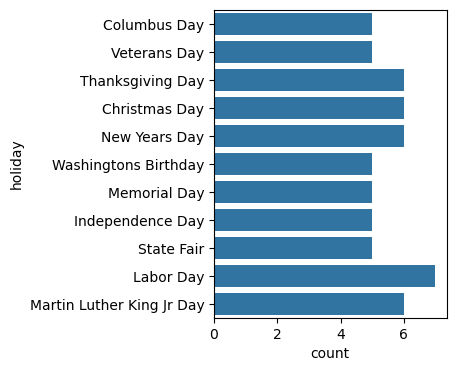

In [16]:
plt.figure(figsize = (3,4))
sns.countplot(y='holiday',data=data)
plt.show()

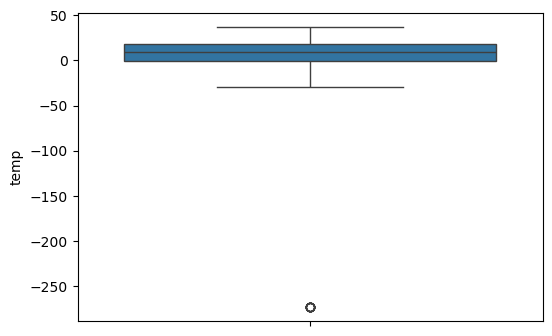

In [17]:
data['temp'] = (data['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot(y='temp',data=data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

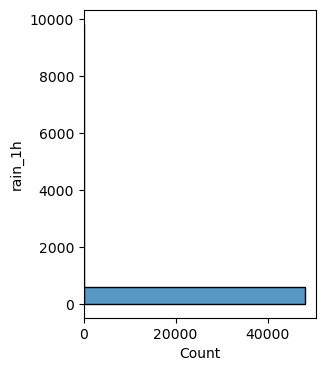

In [19]:
plt.figure(figsize=(3,4))
sns.histplot(y='rain_1h',data=data)
plt.show

# filtering the data and converting all the Features into Numeric Values 

In [117]:
data['holiday'] = data['holiday'].fillna('none').astype(str).str.strip()
data['is_holiday'] = (data['holiday'] != 0 ).astype(int)

In [118]:
data['c_temp'] = (data['temp'].astype(float) - 273).astype(int)

In [119]:
data['rain_1h'] = (data['rain_1h'].clip(lower = 0)).astype(int)
data['snow_1h'] = data['snow_1h'].clip(lower = 0)
data['clouds_all'] = data['clouds_all'].clip(lower = 0 , upper = 100)

In [120]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].dt.hour
data['dayofthe_week'] = data['date_time'].dt.dayofweek
data['month']=data['date_time'].dt.month
data['year'] = data['dat_time'].dt.year
data['is_weekend'] = data['dayofthe_week'].isin([5, 6]).astype(int)

In [121]:
data['weather_main'] = data['weather_main'].astype('category')
data = data.drop(columns =['weather_description'] )
data['weather_main'].cat.categories

Index(['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke',
       'Snow', 'Squall', 'Thunderstorm'],
      dtype='object')

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   holiday         48204 non-null  object        
 1   temp            48204 non-null  float64       
 2   rain_1h         48204 non-null  int64         
 3   snow_1h         48204 non-null  float64       
 4   clouds_all      48204 non-null  int64         
 5   weather_main    48204 non-null  category      
 6   date_time       48204 non-null  datetime64[ns]
 7   traffic_volume  48204 non-null  int64         
 8   is_holiday      48204 non-null  int64         
 9   c_temp          48204 non-null  int64         
 10  hour            48204 non-null  int32         
 11  dayofthe_week   48204 non-null  int32         
 12  month           48204 non-null  int32         
 13  is_weekend      48204 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(2), int32(3

In [123]:
data = data.dropna(subset=['holiday','rain_1h','snow_1h','clouds_all','weather_main','date_time','traffic_volume'])

In [124]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,is_holiday,c_temp,hour,dayofthe_week,month,is_weekend
0,none,288.28,0,0.0,40,Clouds,2012-10-02 09:00:00,5545,1,15,9,1,10,0
1,none,289.36,0,0.0,75,Clouds,2012-10-02 10:00:00,4516,1,16,10,1,10,0
2,none,289.58,0,0.0,90,Clouds,2012-10-02 11:00:00,4767,1,16,11,1,10,0
3,none,290.13,0,0.0,90,Clouds,2012-10-02 12:00:00,5026,1,17,12,1,10,0
4,none,291.14,0,0.0,75,Clouds,2012-10-02 13:00:00,4918,1,18,13,1,10,0


In [125]:
data = pd.get_dummies(data,columns=['weather_main'],dtype = int)
data.sample(20)


,holiday,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,is_holiday,c_temp,hour,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
47045,none,292.290,1,0.0,90,2018-08-25 10:00:00,4509,1,19,10,...,0,0,0,0,1,0,0,0,0,0
41377,none,259.790,0,0.0,1,2018-02-09 13:00:00,5340,1,-13,13,...,0,0,0,0,0,0,0,0,0,0
26093,none,288.670,0,0.0,1,2016-08-28 01:00:00,1050,1,15,1,...,0,0,0,0,1,0,0,0,0,0
25015,none,294.595,0,0.0,36,2016-07-17 13:00:00,4135,1,21,13,...,0,0,0,0,0,1,0,0,0,0
701,none,276.900,0,0.0,90,2012-10-27 16:00:00,4403,1,3,16,...,1,0,0,0,0,0,0,0,0,0
25652,none,294.470,0,0.0,76,2016-08-11 10:00:00,4369,1,21,10,...,0,0,0,0,0,1,0,0,0,0
12902,none,278.650,0,0.0,75,2014-03-14 02:00:00,303,1,5,2,...,1,0,0,0,0,0,0,0,0,0
243,none,268.980,0,0.0,75,2012-10-13 07:00:00,2220,1,-4,7,...,1,0,0,0,0,0,0,0,0,0
18697,none,286.290,0,0.0,1,2015-09-30 19:00:00,3679,1,13,19,...,0,0,0,0,0,0,0,0,0,0
23406,none,282.910,0,0.0,20,2016-05-17 00:00:00,614,1,9,0,...,1,0,0,0,0,0,0,0,0,0


In [131]:
model_data = data[['is_holiday','c_temp','rain_1h','snow_1h','clouds_all','weather_main_Clouds','weather_main_Drizzle','weather_main_Fog','weather_main_Haze','weather_main_Mist','weather_main_Rain','weather_main_Smoke','weather_main_Squall','weather_main_Thunderstorm','hour','dayofthe_week','month','is_weekend','traffic_volume']]

In [132]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   is_holiday                 48204 non-null  int64  
 1   c_temp                     48204 non-null  int64  
 2   rain_1h                    48204 non-null  int64  
 3   snow_1h                    48204 non-null  float64
 4   clouds_all                 48204 non-null  int64  
 5   weather_main_Clouds        48204 non-null  int64  
 6   weather_main_Drizzle       48204 non-null  int64  
 7   weather_main_Fog           48204 non-null  int64  
 8   weather_main_Haze          48204 non-null  int64  
 9   weather_main_Mist          48204 non-null  int64  
 10  weather_main_Rain          48204 non-null  int64  
 11  weather_main_Smoke         48204 non-null  int64  
 12  weather_main_Squall        48204 non-null  int64  
 13  weather_main_Thunderstorm  48204 non-null  int

# Divide Data set into Train and Split

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [149]:
features = ['is_holiday','c_temp','rain_1h','snow_1h','clouds_all','weather_main_Clouds','weather_main_Drizzle','weather_main_Fog','weather_main_Haze','weather_main_Mist','weather_main_Rain','weather_main_Smoke','weather_main_Squall','weather_main_Thunderstorm','hour','dayofthe_week','month','is_weekend',]
x = data[features]
y = model_data['traffic_volume']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)   

In [150]:
x

,is_holiday,c_temp,rain_1h,snow_1h,clouds_all,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Squall,weather_main_Thunderstorm,hour,dayofthe_week,month,is_weekend
0,1,15,0,0.0,40,1,0,0,0,0,0,0,0,0,9,1,10,0
1,1,16,0,0.0,75,1,0,0,0,0,0,0,0,0,10,1,10,0
2,1,16,0,0.0,90,1,0,0,0,0,0,0,0,0,11,1,10,0
3,1,17,0,0.0,90,1,0,0,0,0,0,0,0,0,12,1,10,0
4,1,18,0,0.0,75,1,0,0,0,0,0,0,0,0,13,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,1,10,0,0.0,75,1,0,0,0,0,0,0,0,0,19,6,9,1
48200,1,9,0,0.0,90,1,0,0,0,0,0,0,0,0,20,6,9,1
48201,1,9,0,0.0,90,0,0,0,0,0,0,0,0,1,21,6,9,1
48202,1,9,0,0.0,90,1,0,0,0,0,0,0,0,0,22,6,9,1


# testing using Linear Regression Model 

In [157]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [158]:
y_pred = model.predict(x_test)

In [159]:
results1 = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_pred
})

results1.sample(10)

,Actual,Predicted
36230,392,2517.530794
46048,3031,2208.026284
29353,5286,3283.278200
31839,690,2169.032122
5145,4552,3251.278682
36310,4977,3412.684577
9137,5240,4284.001492
10464,5411,3702.703364
45556,1687,3553.156787
33523,1987,4838.666136


# Checking the Accuracy of the Model 

In [161]:
#r2 Score 
r2 = r2_score(y_test,y_pred)
print(r2)
# MAE 
mae = mean_absolute_error(y_test,y_pred) 
print(mae)
# MSE
mse = mean_squared_error(y_test,y_pred)
print(mse)
# RMSE
rmse = np.sqrt(mse)
print(rmse)

-4.067160371828518
1609.7317644569275
20241476.187739935
4499.052810063462
